# Credit default Analysis




## Introduction

High credit card default rate can make a business in trouble even bankrupt. The propose of this project is to predict whether a client defaults on her/his credit card, the business can underwrite credit cards more carefully to the potential clients who cannot pay bills with high probability.

About the features:

    (1) ID: ID of each client
    (2) LIMIT_BAL: Amount of given credit in NT dollars (includes individual and
    family/supplementary credit
    (3) SEX: Gender (1=male, 2=female)
    (4) EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown,
    6=unknown)
    (5) MARRIAGE: Marital status (1=married, 2=single, 3=others)
    (6) AGE: Age in years
    (7) PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one
    month, 2=payment delay for two months, . . . 8=payment delay for eight months, 9=payment
    delay for nine months and above)
    (8) PAY_2: Repayment status in August, 2005 (scale same as above)
    (9) PAY_3: Repayment status in July, 2005 (scale same as above)
    (10) PAY_4: Repayment status in June, 2005 (scale same as above)
    (11) PAY_5: Repayment status in May, 2005 (scale same as above)
    (12) PAY_6: Repayment status in April, 2005 (scale same as above)
    (13) BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    (14) BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    (15) BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    (16) BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    (17) BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    (18) BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    (19) PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    (20) PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    (21) PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    (22) PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    (23) PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    (24) PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    (25) target: Default payment (1=yes, 0=no)



Dataset: https://www.kaggle.com/datasets/hassanamin/uci-credit-card

In [1]:
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import time

In [2]:
# load data 
data = pd.read_csv('./UCI_Credit_Card.csv')

### Data EDA

In [3]:
data.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
15440,15441,120000.0,1,1,2,27,0,0,0,0,...,74807.0,76952.0,0.0,3500.0,5390.0,3200.0,3500.0,3000.0,77233.0,0
4967,4968,50000.0,2,2,2,22,0,0,0,0,...,29606.0,30305.0,28895.0,1994.0,1500.0,1009.0,1124.0,1100.0,2000.0,1
17401,17402,50000.0,2,2,2,48,-1,-1,0,0,...,7838.0,7998.0,8161.0,8061.0,1398.0,1000.0,160.0,163.0,9217.0,0
3497,3498,240000.0,1,2,1,37,-1,-1,-1,0,...,22241.0,8472.0,500.0,5665.0,35000.0,8877.0,500.0,0.0,21257.0,0
13985,13986,160000.0,2,2,1,38,-1,-1,-1,-1,...,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0,0
3189,3190,50000.0,2,2,2,23,-1,0,0,0,...,2698.0,2500.0,2296.0,1100.0,1181.0,300.0,300.0,300.0,250.0,0
4830,4831,140000.0,1,2,2,36,0,0,0,0,...,80284.0,80086.0,81759.0,3519.0,3027.0,2905.0,3000.0,3000.0,3100.0,0
1878,1879,300000.0,2,1,1,31,-2,-2,-1,0,...,7639.0,1722.0,4064.0,1110.0,12192.0,300.0,191.0,4064.0,390.0,0
25047,25048,360000.0,1,2,1,58,-1,-1,-1,-1,...,3026.0,1133.0,3408.0,10541.0,7600.0,3049.0,1138.0,3414.0,24952.0,1
8696,8697,50000.0,1,3,1,43,2,2,2,0,...,12650.0,13405.0,13793.0,3000.0,0.0,1500.0,1500.0,1000.0,1500.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
data.shape

(30000, 25)

In [6]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
next_month = data['default.payment.next.month'].value_counts()
print(next_month)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


In [8]:
# create a DataFrame for the result
df = pd.DataFrame({'default.payment.next.month': next_month.index,'values': next_month.values})

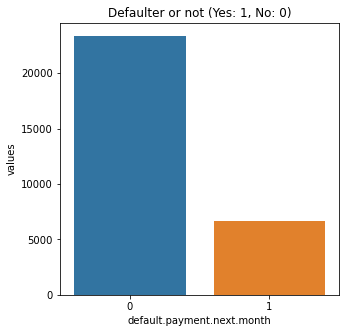

In [9]:
# data visualization
# plt.rcParams['font.sans-serif']=['SimHei'] 
plt.figure(figsize = (5,5))
plt.title('Defaulter or not (Yes: 1, No: 0)')
sns.set_color_codes("pastel")
sns.barplot(x='default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

### Feature Engineering

In [10]:
# drop the useless feature 'ID'
data.drop(['ID'], inplace=True, axis =1)

target = data['default.payment.next.month'].values
features = data.columns.tolist()
features.remove('default.payment.next.month')


In [11]:
dataset = data[features].values

### Data Modeling

In [12]:
# split the dataset. 70% for training and 30 for testing
train_x, test_x, train_y, test_y = train_test_split(dataset, target, test_size=0.30, stratify = target, random_state = 1)

In [13]:
# select classifiers
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
]

# give them names for the sake of display 
classifier_names = [
    'svc', 
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
]

# initialize the parameters for each classifier
classifier_param_grid = [
    {'svc__C':[1], 'svc__gamma': [0.01]},
    {'decisiontreeclassifier__max_depth': [6, 9, 11]},
    {'randomforestclassifier__n_estimators': [3, 5, 6]} ,
    {'kneighborsclassifier__n_neighbors': [4, 6, 8]},
]

In [14]:
# define my function to do the commom work
def my_gridSearchCV(pipeline, train_x, train_y, test_x, test_y, param_grid, score='accuracy'):
    result = {
        "training_time": 0,
        "best_parameter": {},
        "best_score": 0,
        "predict_y": [],
        "accuracy_score": 0,
    }
    gridsearch = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=score)
    
    training_start_time = time.time()
    print(f'Training is started at Epoch Time in Second: {training_start_time}')
    search = gridsearch.fit(train_x, train_y)
    training_end_time = time.time()
    print(f'Training is ended at Epoch Time in Second: {training_end_time}')

    result['training_time'] = training_end_time - training_start_time
    result['best_parameter'] = search.best_params_
    result['best_score'] = search.best_score_
    
    predict_y = gridsearch.predict(test_x)
    result['predict_y'] = predict_y

    test_score = accuracy_score(test_y, predict_y)
    result['accuracy_score'] = test_score
    
    return result

In [15]:
# result list
result_list = []

In [16]:
# use GridSearchCV to look for the best parameters for the given estimator/pipeline
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    result = my_gridSearchCV(pipeline, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy')
    result["model_name"] = model_name
    result_list.append(result)

Training is started at Epoch Time in Second: 1653230326.5760098
Training is ended at Epoch Time in Second: 1653230475.527376
Training is started at Epoch Time in Second: 1653230488.5352225
Training is ended at Epoch Time in Second: 1653230492.6588774
Training is started at Epoch Time in Second: 1653230492.6638732
Training is ended at Epoch Time in Second: 1653230497.6652732
Training is started at Epoch Time in Second: 1653230497.6872678
Training is ended at Epoch Time in Second: 1653230532.1642427


### Evaluate Result

In [17]:
import pprint


for e in result_list:
    pprint.pprint(e)    


{'accuracy_score': 0.8172222222222222,
 'best_parameter': {'svc__C': 1, 'svc__gamma': 0.01},
 'best_score': 0.8186190476190477,
 'model_name': 'svc',
 'predict_y': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'training_time': 148.95136618614197}
{'accuracy_score': 0.8113333333333334,
 'best_parameter': {'decisiontreeclassifier__max_depth': 6},
 'best_score': 0.8208095238095238,
 'model_name': 'decisiontreeclassifier',
 'predict_y': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'training_time': 4.123654842376709}
{'accuracy_score': 0.7994444444444444,
 'best_parameter': {'randomforestclassifier__n_estimators': 6},
 'best_score': 0.8004285714285713,
 'model_name': 'randomforestclassifier',
 'predict_y': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'training_time': 5.001399993896484}
{'accuracy_score': 0.8035555555555556,
 'best_parameter': {'kneighborsclassifier__n_neighbors': 8},
 'best_score': 0.803904761904762,
 'model_name': 'kneighborsclassifier',
 'predict_y': array([0, 0, 0, ...

In [18]:
report = pd.DataFrame(result_list, columns=['model_name', 'accuracy_score', 'training_time'])
print(report)

               model_name  accuracy_score  training_time
0                     svc        0.817222     148.951366
1  decisiontreeclassifier        0.811333       4.123655
2  randomforestclassifier        0.799444       5.001400
3    kneighborsclassifier        0.803556      34.476975
